<a href="https://colab.research.google.com/github/Samridhi011/ColorCombo/blob/main/Color_Combination_Advisor_for_Clothing_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Color Combination Advisor for Clothing Selection**

---
A halt to the daily confusions while getting ready for various occasions.


## **ABSTRACT**
Choosing the right color combination for clothing can greatly impact one's appearance and confidence in various settings. This project aims to develop a machine learning model that helps users select the optimal color combinations for different occasions such as meetings, casual outings, or formal events. By analyzing color psychology and fashion trends, the model suggests the most suitable color combinations based on the user's preferences and the context of the event. The project utilizes machine learning algorithms and other technologies to provide personalized recommendations, enhancing users' fashion choices and confidence.

**For Boys as well as for Girls**

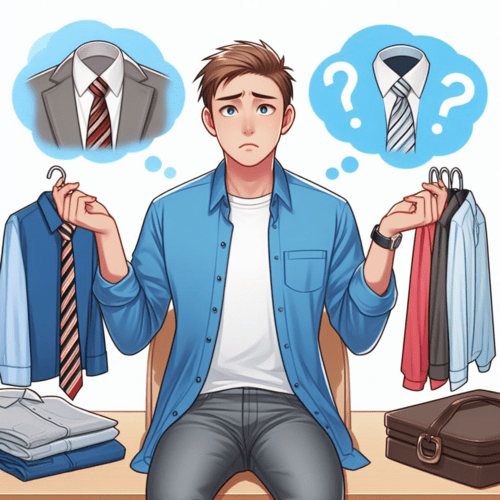

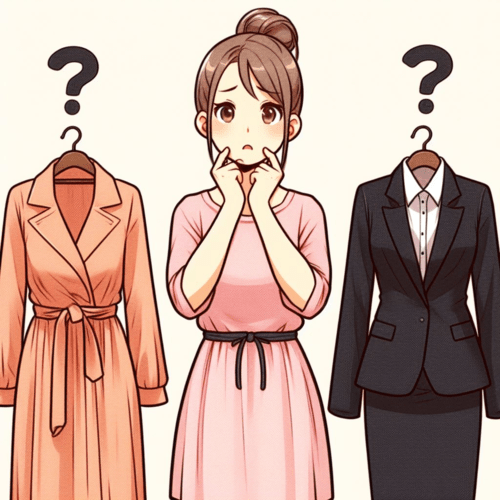

##Import Library
image.png

In [ ]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from itertools import product

##Import Data

In [ ]:
#import csv data
fashion_data = pd.read_csv('https://github.com/Samridhi011/ColorCombo/raw/main/fashion_data.csv')

In [ ]:
fashion_data.head()

,Pattern,Color1,Color2,Occasion,ColorCombination
0,Solid,Red,White,Meeting,Red & White
1,Striped,Blue,Black,Casual,Blue & Black
2,Checkered,Green,Gray,Formal,Green & Gray
3,Floral,Yellow,Orange,Party,Yellow & Orange
4,Solid,Pink,Brown,Meeting,Pink & Brown


In [ ]:
fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Pattern           76 non-null     object
 1   Color1            76 non-null     object
 2   Color2            76 non-null     object
 3   Occasion          76 non-null     object
 4   ColorCombination  76 non-null     object
dtypes: object(5)
memory usage: 3.1+ KB


In [ ]:
description = fashion_data.describe()

In [ ]:
print(description)

       Pattern Color1  Color2 Occasion ColorCombination
count       76     76      76       76               76
unique       4     11      11        4               55
top      Solid   Blue  Yellow  Meeting     Black & Gray
freq        19     10      10       19                3


In [ ]:
# Define features (X) and target variable (y)
X = fashion_data[['Pattern', 'Color1', 'Color2', 'Occasion']]  # Features: Clothing pattern, Color1, Color2, Occasion
y = fashion_data['ColorCombination']

# Target variable: Color combination

# Display the first few rows of X and y to verify
print("Features (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())

Features (X):
     Pattern  Color1  Color2 Occasion
0      Solid     Red   White  Meeting
1    Striped    Blue   Black   Casual
2  Checkered   Green    Gray   Formal
3     Floral  Yellow  Orange    Party
4      Solid    Pink   Brown  Meeting

Target variable (y):
0        Red & White
1       Blue & Black
2       Green & Gray
3    Yellow & Orange
4       Pink & Brown
Name: ColorCombination, dtype: object


##Data Visualization

In [ ]:
# Plot the distribution of colors
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Count occurrences of each color
color1_counts = fashion_data['Color1'].value_counts()
color2_counts = fashion_data['Color2'].value_counts()

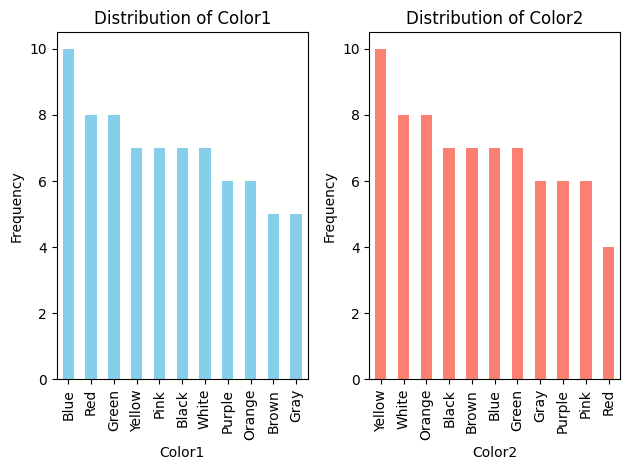

In [ ]:
# Plot color1 distribution
plt.subplot(1, 2, 1)
color1_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Color1')
plt.xlabel('Color1')
plt.ylabel('Frequency')

# Plot color2 distribution
plt.subplot(1, 2, 2)
color2_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Color2')
plt.xlabel('Color2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

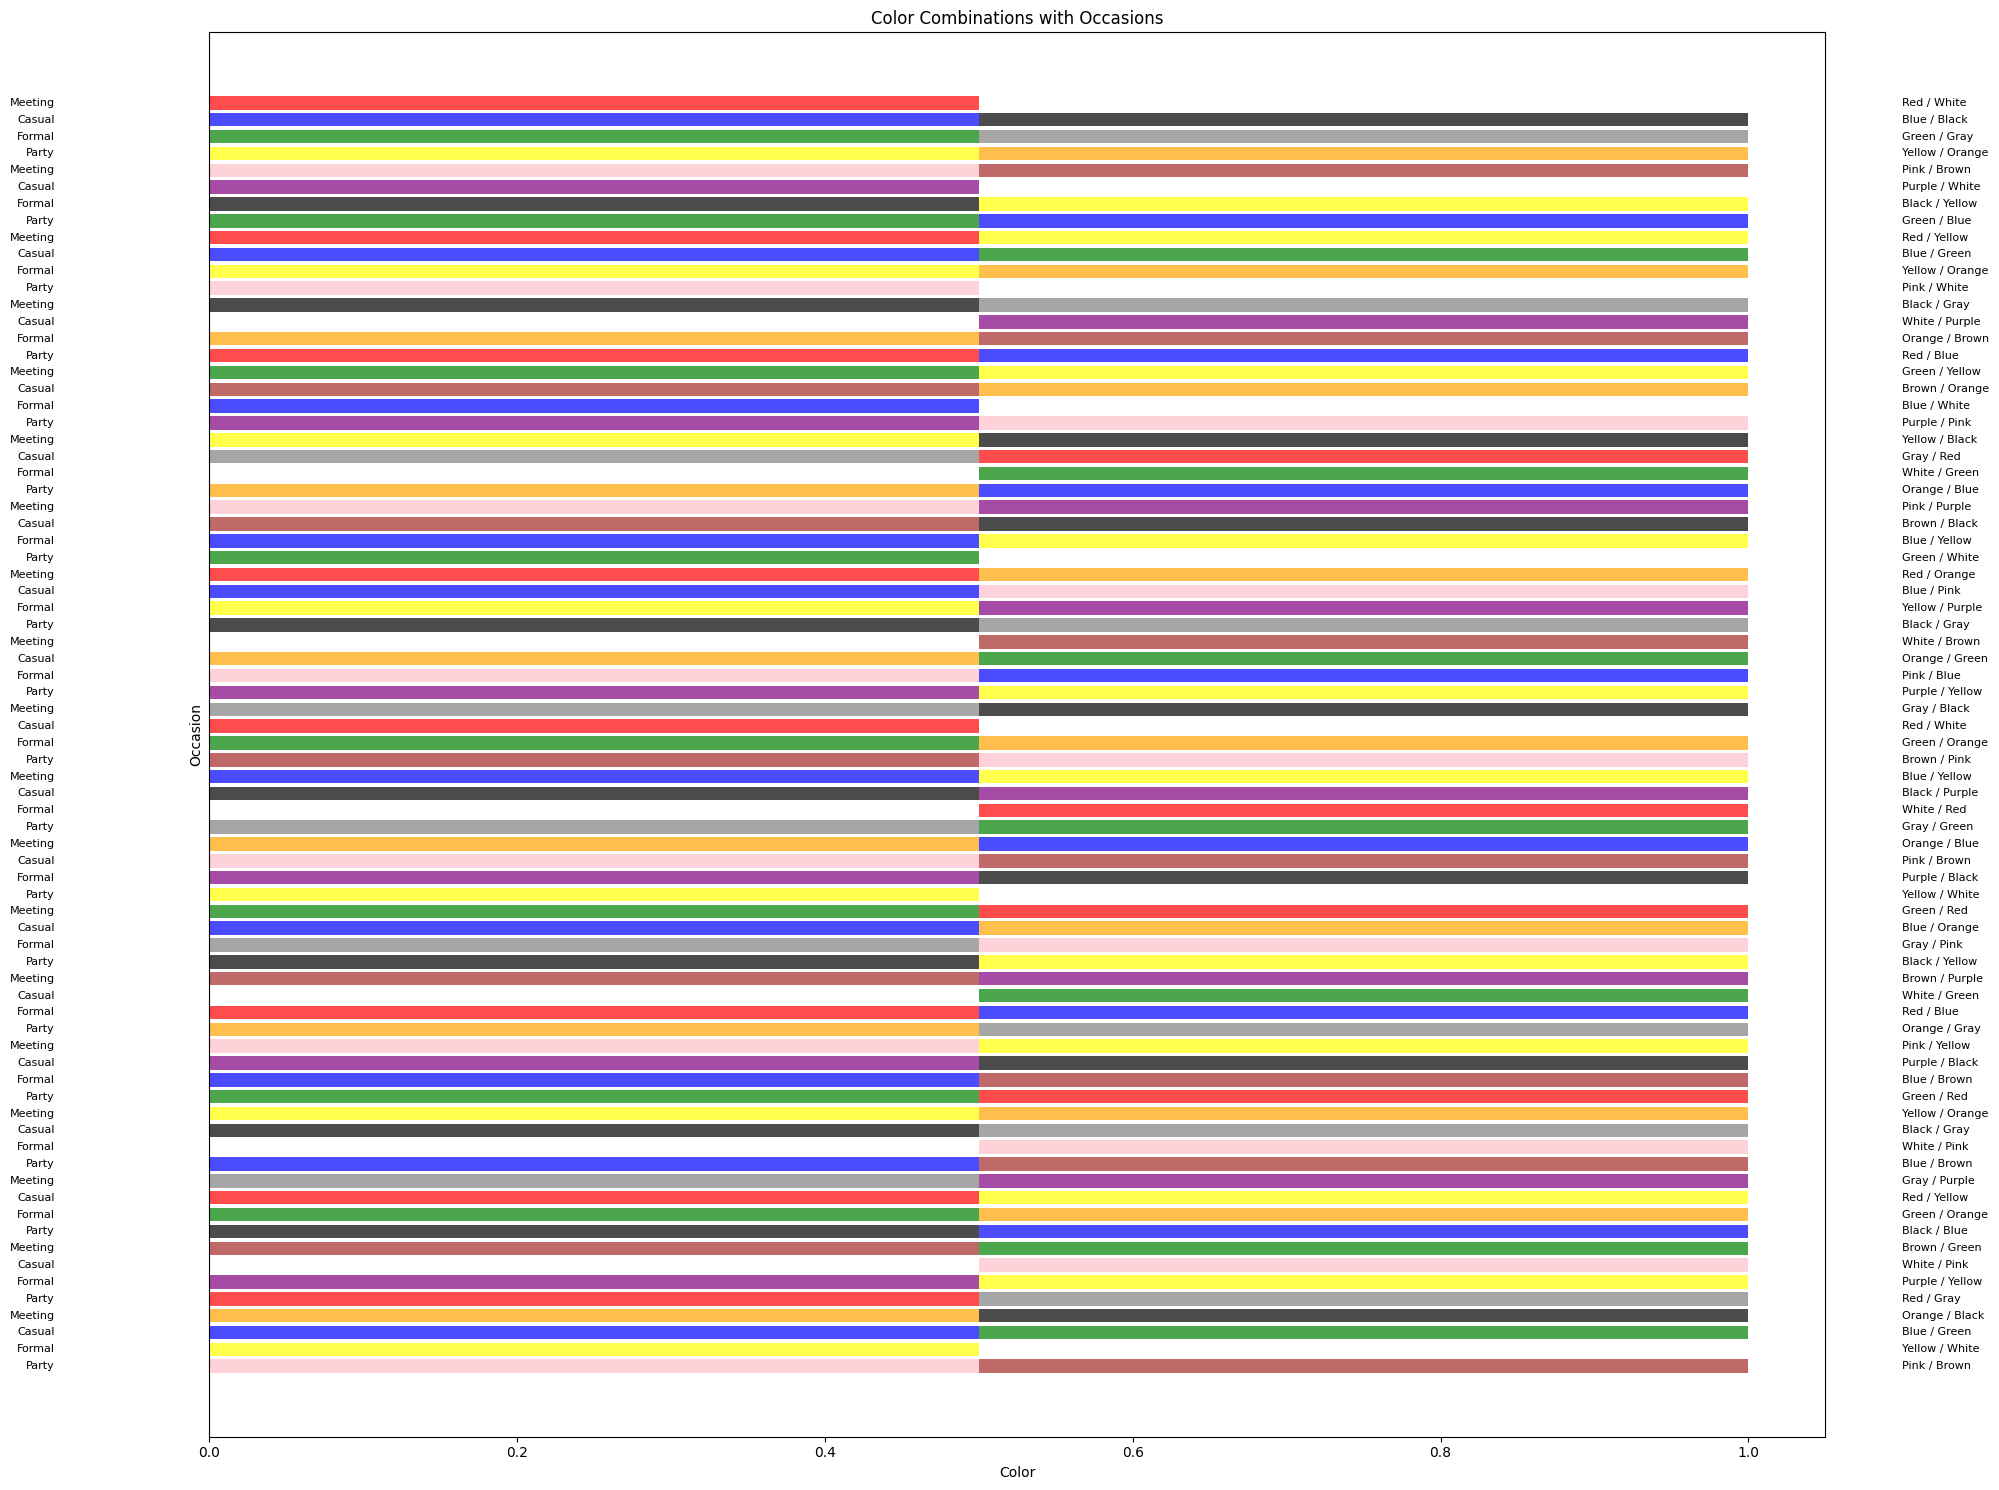

In [ ]:
# Create a horizontal bar plot with half shade of Color1 and Color2 and write the occasion name on the bar
plt.figure(figsize=(20, 15))

# Iterate over each color combination
for i, (color1, color2, occasion) in enumerate(zip(X['Color1'], X['Color2'], X['Occasion'])):
    # Calculate the position of the bar
    y = len(X) - i - 1

    # Plot the first half of the bar representing Color1
    plt.barh(y, 0.5, color=color1, alpha=0.7)
    # Plot the second half of the bar representing Color2
    plt.barh(y, 0.5, left=0.5, color=color2, alpha=0.7)

    # Write the occasion name on the bar (to the left side)
    plt.text(-0.1, y, occasion, ha='right', va='center', color='black', fontsize=8)

    # Display color information on the right side of the bar
    plt.text(1.1, y, f"{color1} / {color2}", ha='left', va='center', color='black', fontsize=8)

# Remove y-axis ticks
plt.yticks([])

plt.title('Color Combinations with Occasions')
plt.xlabel('Color')
plt.ylabel('Occasion')
plt.tight_layout()
plt.show()

##Data Preprocessing

In [ ]:
# Separate features and target variable
X = fashion_data[['Pattern', 'Color1', 'Color2', 'Occasion']]
y = fashion_data['ColorCombination']

##Split data into Training and Testing Sets

In [ ]:
# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier()

# Train the model only on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Evaluate model accuracy on the testing data
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.25


##Result
Predicting Color Combinations for Occasions

In [ ]:
# Given lists of colors and occasions
color1 = ['red', 'blue', 'green']
color2 = ['light', 'dark']
occasions = ['wedding', 'business meeting', 'casual outing']

# Dictionary mapping color combinations to occasions
color_combinations = {
    ('red', 'light'): 'wedding',
    ('red', 'dark'): 'business meeting',
    ('blue', 'light'): 'casual outing',
    ('blue', 'dark'): 'casual outing',
    ('green', 'light'): 'business meeting',
    ('green', 'dark'): 'casual outing'
}

# Generate all possible combinations of colors
all_combinations = list(product(color1, color2))

# Predict occasions for each combination
for combination in all_combinations:
    color_combo = tuple(combination)
    if color_combo in color_combinations:
        occasion = color_combinations[color_combo]
        print(f"Colors: {color_combo}, Occasion: {occasion}")
    else:
        print(f"No occasion found for colors: {color_combo}")

Colors: ('red', 'light'), Occasion: wedding
Colors: ('red', 'dark'), Occasion: business meeting
Colors: ('blue', 'light'), Occasion: casual outing
Colors: ('blue', 'dark'), Occasion: casual outing
Colors: ('green', 'light'), Occasion: business meeting
Colors: ('green', 'dark'), Occasion: casual outing
